# King County House Sales
## EDA and Prediction


*About Dataset**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.


https://www.kaggle.com/datasets/harlfoxem/housesalesprediction


Below screenshot explains what all headers mean.

Credits [ 3rd page of the document] - https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices

## Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the Dataset

In [2]:
df = pd.read_csv('kc_house_data.csv')

## EDA TIME

In [3]:
#Checking for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# It looks like there are no missing values in the dataset

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Visualization

<AxesSubplot:xlabel='price', ylabel='Count'>

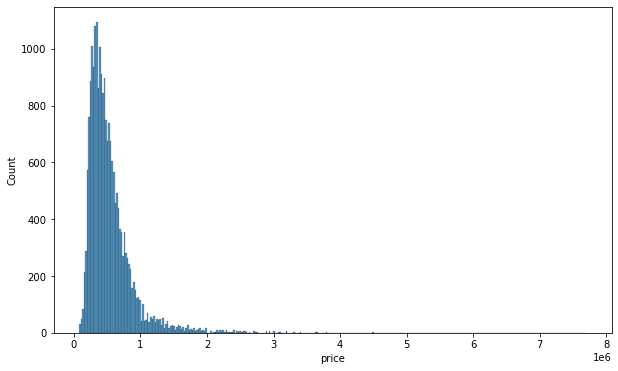

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'])

In [9]:
## looks like most houses falling between 0-2 M dollars. Lets remove the extreme outliers..

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

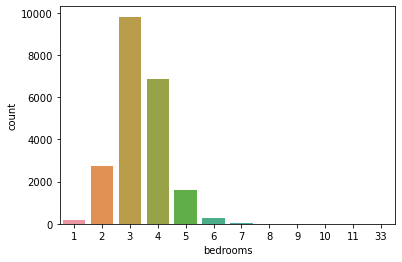

In [10]:
sns.countplot(x='bedrooms',data=df)

In [11]:
# Lets compare the price with the feature that has the highest correlation with price.
# First lets check the correlation
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [12]:
## looks like sqft_living is highly correlated with the price.
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

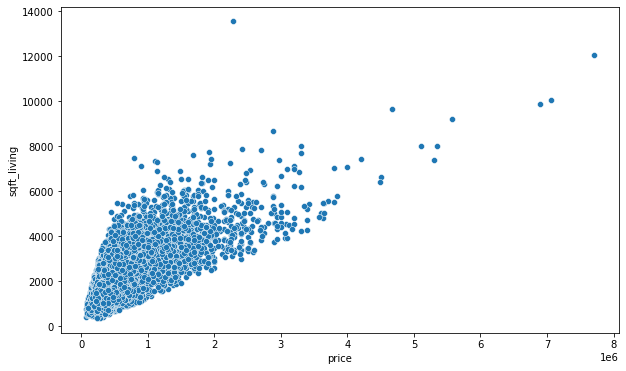

In [13]:
# Scatterplot of the highly correlated feature
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

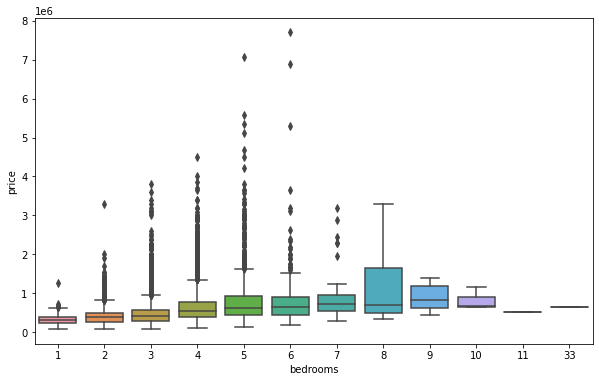

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

In [15]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='long'>

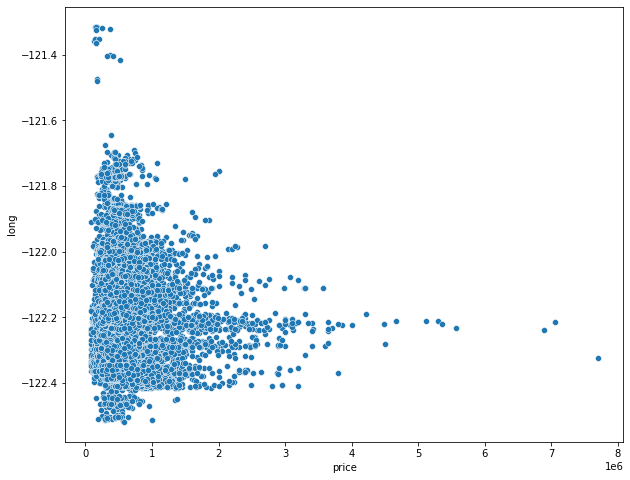

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

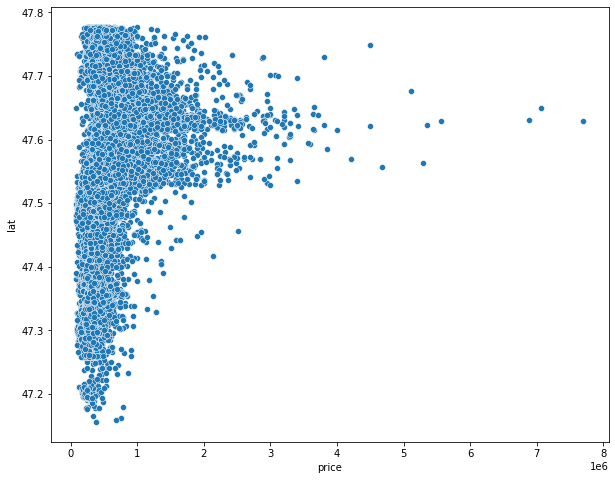

In [17]:
# looks like long 122.2 expensive housing area
# Lets do the same for lattitude
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

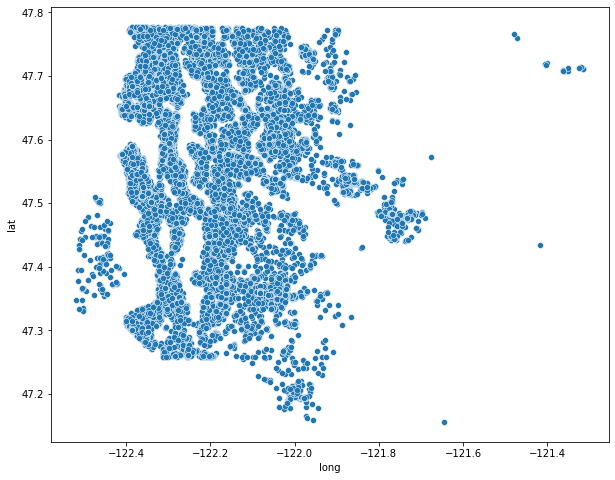

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

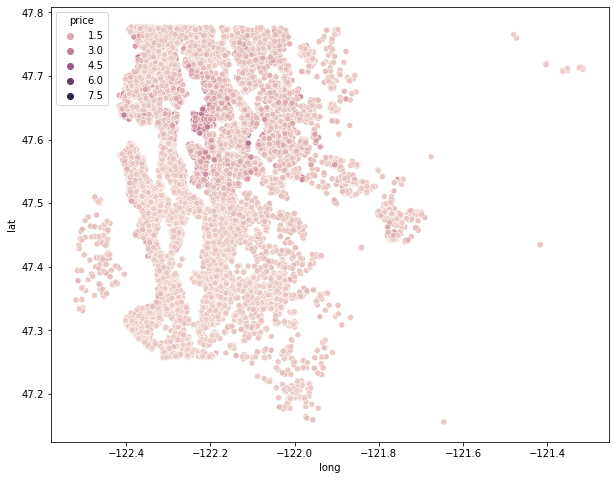

In [19]:
# looks like the map of King County
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',hue='price',data=df)

In [20]:
#Removing extreme outliers so that better visualization
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [21]:
## Dropping all the above 3.6M
# Checking the length of the dataframe
len(df)

21597

In [22]:
non_top_houses = df[df['price']<3600000.0]

In [23]:
len(non_top_houses)

21576

<AxesSubplot:xlabel='long', ylabel='lat'>

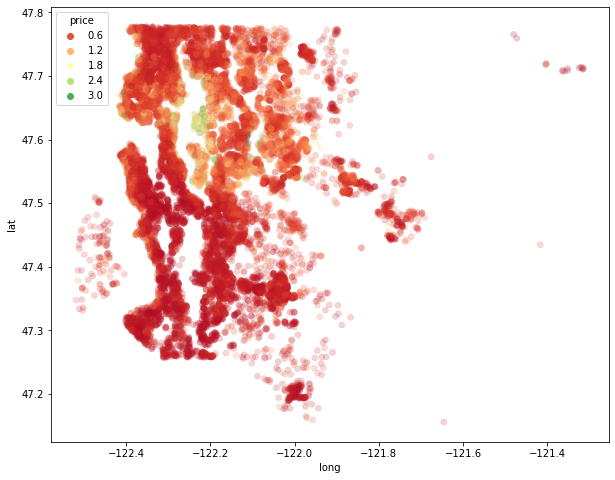

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',hue='price',data=non_top_houses,edgecolor=None,alpha=0.2,palette='RdYlGn')

<AxesSubplot:xlabel='long', ylabel='lat'>

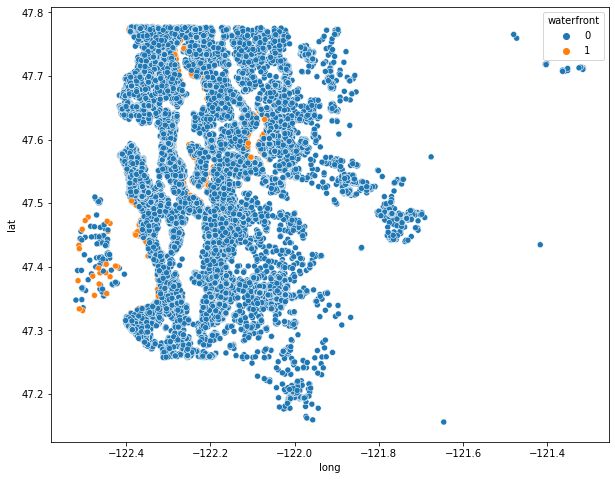

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',hue='waterfront',data=non_top_houses)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

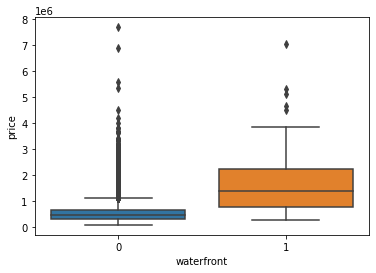

In [26]:
sns.boxplot(x='waterfront',y='price',data=df)

In [27]:
# Looks like if you are on waterfront you are more likely to be expensive

In [28]:
# Lets drop if as there is no use for it
df.drop('id',axis=1,inplace=True)

In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:

df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [31]:
# We can see the date column is just a string

In [32]:
# So lets convert it to DateTime Object
# Then we will able to extract, date, month and year
df['date']=pd.to_datetime(df['date'])

In [33]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [34]:
# Feature Engineering (Extracting Importatt Features)
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)

In [35]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

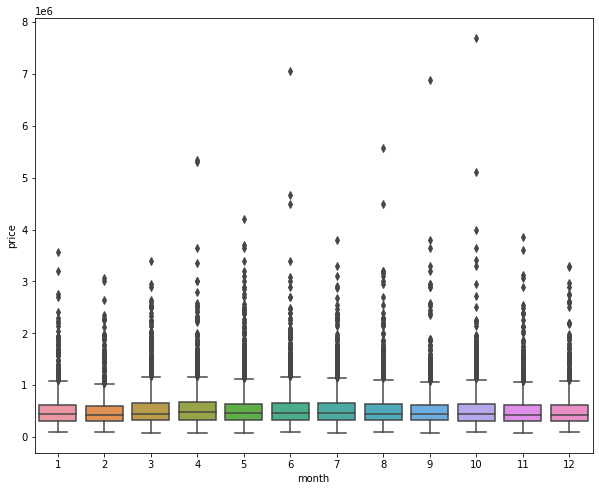

In [36]:
# Prices in Dec vs March
plt.figure(figsize=(10,8))
sns.boxplot(x='month',y='price',data=df)

In [37]:
# We cant see any significant distribution differences b/w the months
# So

In [38]:
# This will allow to read the numbers
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

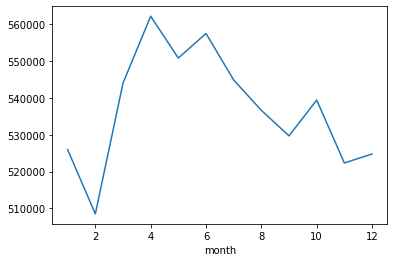

In [39]:
# Plotting this
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

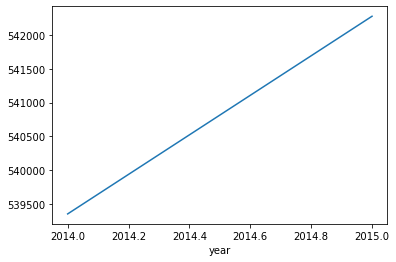

In [40]:
# Looks like there is some distribution in prices acc to months
# Lets do the same with year
df.groupby('year').mean()['price'].plot()

In [41]:
# We can expect this, as the time goes on the price increases..

In [42]:
# Lets drop the date column
df.drop("date",axis=1,inplace=True)

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [44]:
# zipcode is an integer, if we feed this, the model will treat this as a continuous feature
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [45]:
# As there are 70 different zipcodes, wont do pd.getdummy on this
# Lets ignore them..
df.drop('zipcode',axis=1,inplace=True)

In [46]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [47]:
# Most Values are 0.
# 0 is not actually the year, means house is not renovated.
# clearly it makes more sense to categorise this as the house is renovated or not( irrespective of the year.)
# So we can perform feature engineering on this
# We can also think it like,
# the most recent the house is renovated the higher will be the price
# so lets keep this as it is

In [48]:
# Similar situation here also
# We will also keep it as it is.
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [49]:
# so in Feature engineering,
# it is our decision to make it categorical or continuous

In [50]:
# Tensorflow needs numeric arrays
X=df.drop('price',axis=1).values
y=df['price'].values


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X_train = scaler.fit_transform(X_train)

In [56]:
# We dont fit to our test set
X_test = scaler.transform(X_test)

In [57]:
import tensorflow as tf

In [58]:
#Lets take a look at the shape of the feature data
X_train.shape

(15117, 19)

In [59]:
model = tf.keras.models.Sequential()
# No. of neurons = Size of our feature data
model.add(tf.keras.layers.Dense(19,activation='relu'))
model.add(tf.keras.layers.Dense(19,activation='relu'))
# This may over fit the training data
# We will able to check it by passing the validation data along with our training data
model.add(tf.keras.layers.Dense(1))
# adam optimizer is a good opitmizer
# Since a regression problem, and we choosing a continuous label i.e price,loss = 'mse'
model.compile(optimizer='adam',loss='mse')

In [60]:
#trainig the model
#we will also pass in validation data
#After each epoch, we will run the test data and check loss on the test data
# It will only use it for updating the weights and biases acc to the test set
# it will give us some nice plots to see if we are overfitting or not.
# Becoz the datasize is large, we will feed it in batches(common to do in powers of 2).
# Smaller the batch size, longer the training takes place, but less likely you are going to overfit your data
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 429753499648.0000 - val_loss: 420140253184.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 429721419776.0000 - val_loss: 420068851712.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 429572096000.0000 - val_loss: 419827253248.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 429206994944.0000 - val_loss: 419334389760.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 428549210112.0000 - val_loss: 418517843968.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 427530977280.0000 - val_loss: 417308311552.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 426067755008.0000 - val_loss: 415627608064.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 424111046656.0000 - val_loss: 413442539520.0000
Epoch 9/400
119/

119/119 [==============================] - 0s 1ms/step - loss: 96145121280.0000 - val_loss: 95341887488.0000
Epoch 68/400
119/119 [==============================] - 0s 1ms/step - loss: 95871320064.0000 - val_loss: 95081652224.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 95589179392.0000 - val_loss: 94817992704.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 95306391552.0000 - val_loss: 94546468864.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 95012020224.0000 - val_loss: 94269808640.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 94711955456.0000 - val_loss: 93991673856.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 94413324288.0000 - val_loss: 93709852672.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 94106337280.0000 - val_loss: 93420666880.0000
Epoch 75/400
119/119 [===============

Epoch 134/400
119/119 [==============================] - 0s 1ms/step - loss: 72548892672.0000 - val_loss: 73161252864.0000
Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 72173273088.0000 - val_loss: 72812863488.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 71799316480.0000 - val_loss: 72461189120.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 71426433024.0000 - val_loss: 72109359104.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 71045423104.0000 - val_loss: 71755538432.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 70663708672.0000 - val_loss: 71397302272.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 70282313728.0000 - val_loss: 71045390336.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 69907972096.0000 - val_loss: 70692061184.0000
Epoch 142/400
11

119/119 [==============================] - 0s 1ms/step - loss: 52757585920.0000 - val_loss: 54691397632.0000
Epoch 201/400
119/119 [==============================] - 0s 1ms/step - loss: 52599676928.0000 - val_loss: 54543450112.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 52443205632.0000 - val_loss: 54392643584.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 52291289088.0000 - val_loss: 54252261376.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 52147560448.0000 - val_loss: 54109089792.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 51999784960.0000 - val_loss: 53971394560.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 51857072128.0000 - val_loss: 53838995456.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 51715870720.0000 - val_loss: 53702561792.0000
Epoch 208/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 46885806080.0000 - val_loss: 48924946432.0000
Epoch 267/400
119/119 [==============================] - 0s 1ms/step - loss: 46828847104.0000 - val_loss: 48870756352.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 46781210624.0000 - val_loss: 48820187136.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 46736261120.0000 - val_loss: 48771424256.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 46686208000.0000 - val_loss: 48721121280.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 46638112768.0000 - val_loss: 48672350208.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 46597697536.0000 - val_loss: 48623304704.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 46541119488.0000 - val_loss: 48574238720.0000
Epoch 274/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 44329316352.0000 - val_loss: 46258368512.0000
Epoch 333/400
119/119 [==============================] - 0s 1ms/step - loss: 44302610432.0000 - val_loss: 46221484032.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 44259258368.0000 - val_loss: 46184800256.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 44228222976.0000 - val_loss: 46147907584.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 44190732288.0000 - val_loss: 46112272384.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 44156067840.0000 - val_loss: 46075486208.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 44118630400.0000 - val_loss: 46038568960.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 44080984064.0000 - val_loss: 46001491968.0000
Epoch 340/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 42357035008.0000 - val_loss: 44232593408.0000
Epoch 399/400
119/119 [==============================] - 0s 1ms/step - loss: 42333671424.0000 - val_loss: 44208730112.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 42315464704.0000 - val_loss: 44185616384.0000


In [61]:
#Getting a list of losses
model.history.history

{'loss': [429753499648.0,
  429721419776.0,
  429572096000.0,
  429206994944.0,
  428549210112.0,
  427530977280.0,
  426067755008.0,
  424111046656.0,
  421628608512.0,
  418578464768.0,
  414956650496.0,
  410738262016.0,
  405913501696.0,
  400481550336.0,
  394461184000.0,
  387849486336.0,
  380652781568.0,
  372905082880.0,
  364618219520.0,
  355872276480.0,
  346645430272.0,
  336999186432.0,
  326992789504.0,
  316660776960.0,
  306055020544.0,
  295233224704.0,
  284256698368.0,
  273178066944.0,
  262030295040.0,
  250882080768.0,
  239830908928.0,
  228879237120.0,
  218169720832.0,
  207689973760.0,
  197519835136.0,
  187714568192.0,
  178342658048.0,
  169383706624.0,
  160945815552.0,
  153005096960.0,
  145696866304.0,
  138944299008.0,
  132811972608.0,
  127282921472.0,
  122367123456.0,
  118051831808.0,
  114285477888.0,
  111090360320.0,
  108409724928.0,
  106170753024.0,
  104323399680.0,
  102861512704.0,
  101691129856.0,
  100776009728.0,
  100056326144.0,
  

In [62]:
# now becuase we passed in the validation data tuple
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.297535e+11,4.201403e+11
1,4.297214e+11,4.200689e+11
2,4.295721e+11,4.198273e+11
3,4.292070e+11,4.193344e+11
4,4.285492e+11,4.185178e+11
...,...,...
395,4.240158e+10,4.427916e+10
396,4.237953e+10,4.425606e+10
397,4.235704e+10,4.423259e+10
398,4.233367e+10,4.420873e+10


<AxesSubplot:>

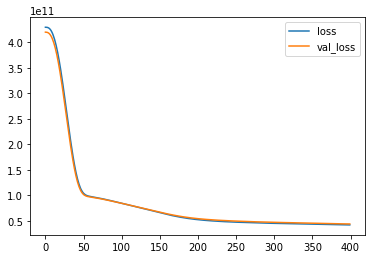

In [63]:
# We can see the loss on the validation data i.e the test dataset
# Now we will plot loss on training vs loss on val/test to check if we are overfitting the training of our model.
losses = pd.DataFrame(model.history.history)
losses.plot()

In [64]:
# this is the kind of plot we wanted where both behaviour same.(when one decreases the other also, no increase further in both)
#It means we could have continued our training without overfitting our training data (as our val_loss is also going down)
# if val_loss had gone up or spike after some epochs that would have meant we had overfitted.(as you have much higher loss on your validation data)

## Evaluating Our Model

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [66]:
predictions = model.predict(X_test)

In [67]:
predictions

array([[153142.02],
       [401197.22],
       [305135.4 ],
       ...,
       [418872.4 ],
       [627364.56],
       [363220.97]], dtype=float32)

In [68]:
# RMSE
np.sqrt(mean_squared_error(y_test,predictions))

210203.74430907972

In [69]:
# MAE
mean_absolute_error(y_test,predictions)

126252.51885284907

In [70]:
# looks like we are off by 126 thousand dollars in predicting our price

In [71]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [72]:
# looks like mean is 540296.6
# so it looks like we are off by around 20% which is not good.
# getting deeper understanding of our evaluation metric

In [73]:
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test,predictions)

0.6667786654598051

In [74]:
# looks like okayy

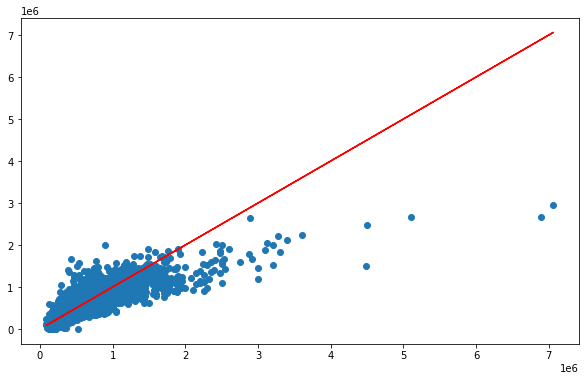

In [75]:
# Checking for perfect fit (if it comes out to be a straight line)
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
# the perfect fitting line
plt.plot(y_test,y_test,'r')

In [76]:
# We can see we getting punished by the extreme outliers that are the extreme expensive houses.
# We are good in predicting the prices between 1M and 2M dollars

## Predicting the Price

In [77]:
# The features of first hoouse without its price
df.drop('price',axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [78]:
single_house = df.drop('price',axis=1).iloc[0]

In [79]:
# Our model is trained on scaled features so we will need to scale these

In [81]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [82]:
# looks like the shape is off, so need to reshape it
# As only 1 Set of brackets
# -1 means keep those old dimensions along the axis
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [83]:
# Scaling the features
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [84]:
model.predict(single_house)

array([[227473.1]], dtype=float32)

In [85]:
# The actual price
df['price'].iloc[0]

221900.0

In [87]:
# Looks like overshotting the prices a little bit becoz of the extreme outliers.
percent = (227473.1-221900.0)*100/221900.0
print(f"Our Prediction is off by: {percent}%")

Our Prediction is off by: 2.5115367282559737%


In [88]:
# You can retrain the model by dropping off maybe the top expensive 1 percent house.
# Its upto you!

## THANKYOU